In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import three used BioPython packages
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

In [4]:
# assign directory
directory = '../data_viruses'
 
# iterate over files in
temp_list = []
# iterate over files in the directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    print(f)
    # take the sequence from the genbank file (should be just 1 always i believe)
    t = SeqIO.read(f, "genbank")
    t.name = t.name[:-3]
    t.id = t.name
    temp_list.append(t)

# Combine all of the individual sequences into a new file 
_ = SeqIO.write(temp_list, "hpvs.fasta", "fasta")

../data_viruses/download_GenBank_HPV12REF_e9d4985b.txt
../data_viruses/download_GenBank_HPV19REF_582088c8.txt
../data_viruses/download_GenBank_HPV21REF_a79c880f.txt
../data_viruses/download_GenBank_HPV132REF_aa5ef975.txt
../data_viruses/download_GenBank_HPV47REF_f98ba058.txt
../data_viruses/download_GenBank_HPV54REF_e7565f2e.txt
../data_viruses/download_GenBank_HPV25REF_75812625.txt
../data_viruses/download_GenBank_HPV22REF_008eb6c4.txt
../data_viruses/download_GenBank_HPV57REF_7b050a7a.txt
../data_viruses/download_GenBank_HPV33REF_73421e5b.txt
../data_viruses/download_GenBank_HPV100REF_0af15040.txt
../data_viruses/download_GenBank_HPV59REF_4c9c2666.txt
../data_viruses/download_GenBank_HPV15REF_fbb88293.txt
../data_viruses/download_GenBank_HPV65REF_5b5ec1cd.txt
../data_viruses/download_GenBank_HPV56REF_7876cb5c.txt
../data_viruses/download_GenBank_HPV51REF_c0c51a39.txt
../data_viruses/download_GenBank_HPV60REF_28ad60bc.txt
../data_viruses/download_GenBank_HPV68REF_ada30660.txt
../data_

In [5]:
# Load the turtles sequences into MUSCLE 
#https://www.ebi.ac.uk/Tools/msa/muscle/
# Upload the new alignment file to your folder or working directory 

In [7]:
# Open the alignment file as a MultipleSeqAlignment object 
with open("dna_alignment.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")

<class 'Bio.Align.MultipleSeqAlignment'>


In [9]:
# Open and initiate the Distance Calculator using the Identity model 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')

In [10]:
# Write the Distance Matrix 
distance_matrix = calculator.get_distance(alignment)

HPV41	0
HPV57	0.470423491470763	0
HPV27	0.46719850632266824	0.16082491725367054	0
HPV2	0.4668590342018162	0.16472884664346943	0.10294492064839178	0
HPV61	0.47466689298141385	0.3319188661631164	0.33293728252567256	0.33505898328099804	0
HPV29	0.47135703980310617	0.3404905372146313	0.348553000084868	0.3494865484172113	0.34303657812102184	0
HPV10	0.4759399134346092	0.3381142323686668	0.3411694814563354	0.3421878978188916	0.3451582788763473	0.23839429686836966	0
HPV3	0.4686412628362896	0.3365017397946194	0.3353984554018501	0.33845370448951884	0.33743528812696255	0.24874819655435798	0.20588984129678345	0
HPV28	0.4776372740388696	0.34303657812102184	0.3401510650937791	0.34252736993974375	0.3320037341933294	0.2459475515573284	0.19553594161079524	0.1560723075617415	0
HPV7	0.4800984469150471	0.39039293897988625	0.3953152847322413	0.3986251379105491	0.3902232029194602	0.3901383348892472	0.39090214716116434	0.38572519731817023	0.39548502079266745	0
HPV32	0.4726300602563015	0.3865738776203005	0.379

In [12]:
# Open and initiate the Tree Constructor 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

In [13]:
# Build the tree 
turtle_tree = constructor.build_tree(alignment)
turtle_tree.rooted = True
print(turtle_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner65')
        Clade(branch_length=7.575134727997104e-05, name='Inner64')
            Clade(branch_length=0.0085453984288806, name='Inner62')
                Clade(branch_length=0.00924627191899214, name='Inner60')
                    Clade(branch_length=0.028523709494854, name='Inner50')
                        Clade(branch_length=0.0019751429547683053, name='Inner49')
                            Clade(branch_length=0.0403849510349297, name='Inner9')
                                Clade(branch_length=0.08829811310079505, name='HPV18')
                                Clade(branch_length=0.08695436928908873, name='HPV45')
                            Clade(branch_length=0.13193958431260486, name='HPV59')
                        Clade(branch_length=0.034836365150128584, name='Inner12')
                            Clade(branch_length=0.003342562731618981, name='Inner11')
                                Clade(branch_length=0.09005558855

In [33]:
# Save the tree to a new file 
Phylo.write(turtle_tree, "hpv_tree.xml", "phyloxml")
Phylo.write(turtle_tree, "hpv_tree_ne.xml", "nexml")
Phylo.write(turtle_tree, "hpv_tree.nh", "newick")

1

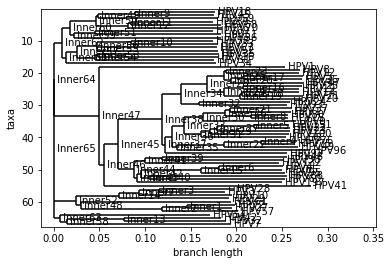

In [15]:
# Import matplotlib and create a basic tree 
fig = Phylo.draw(turtle_tree)

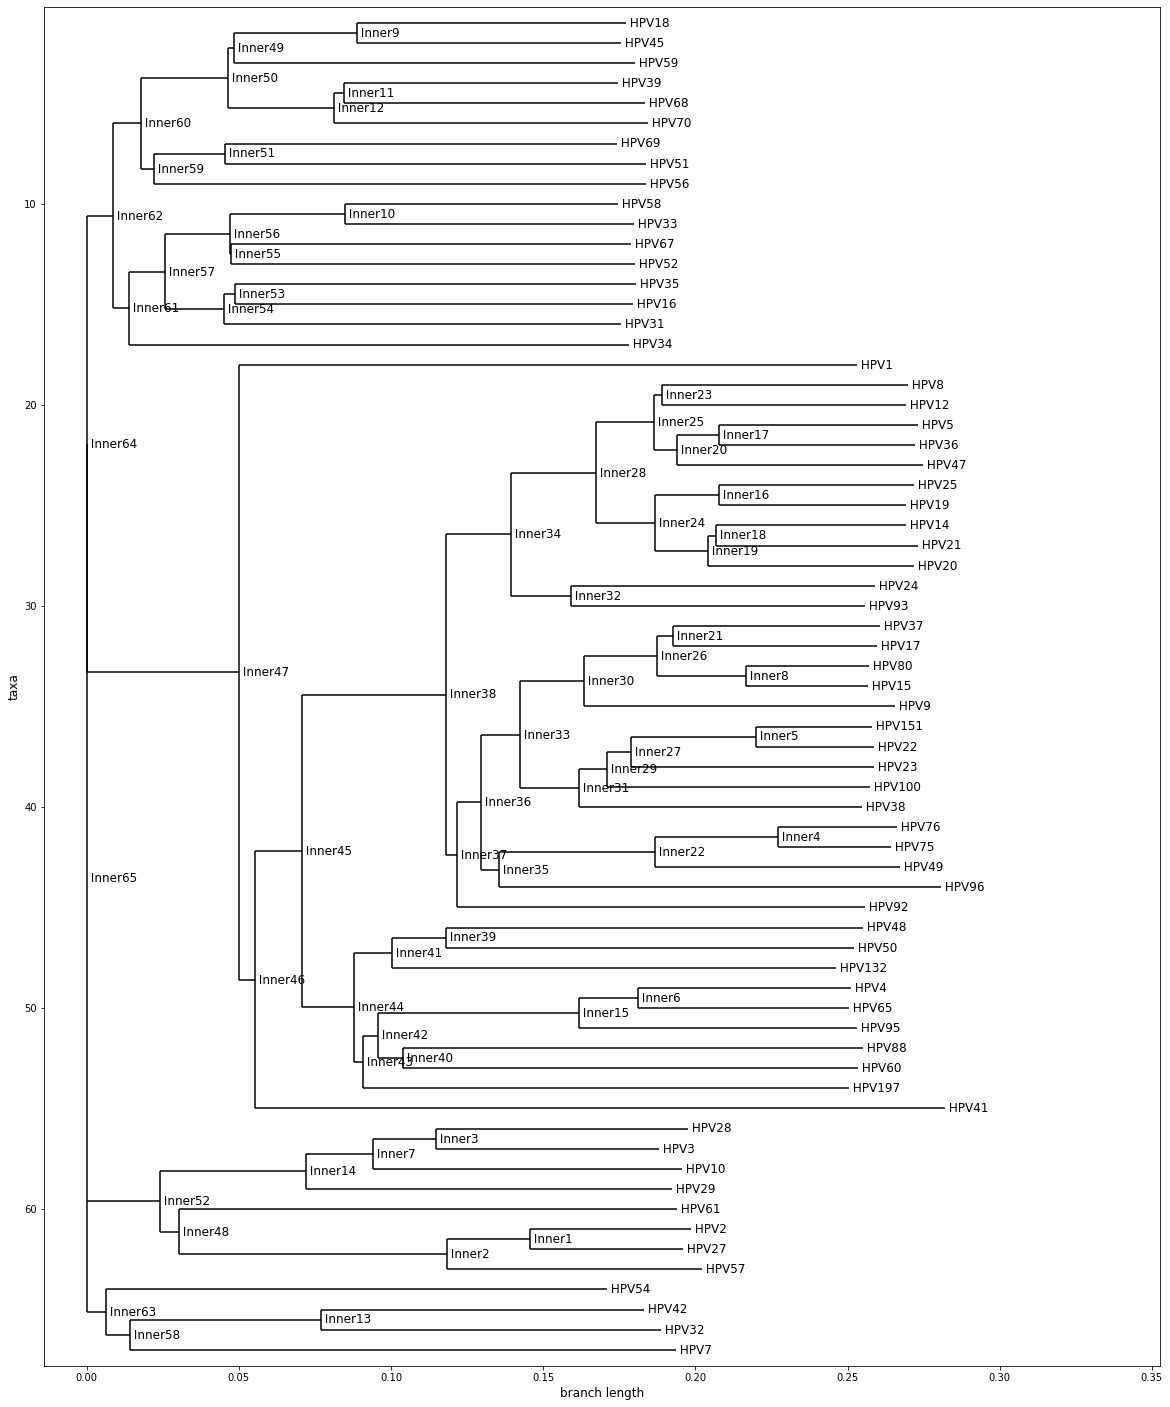

In [20]:
import matplotlib
fig = plt.figure(figsize=(20, 25)) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
#turtle_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(turtle_tree, axes=axes)
fig.savefig("turtles_cladogram")

In [3]:
from ete3 import Tree
# Load a tree structure from a newick file.
t = Tree("hpv_tree.nh", format=1)

In [ ]:
t.show()

In [30]:
Phylo.write?

In [41]:
import PyQt5